Import Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data :

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "StudentPerformanceFactors.csv"

# Load the latest version
students = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "lainguyn123/student-performance-factors",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


# Understanding and preprocessing the data :

show first data rows :

In [3]:
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


shape of the data

In [4]:
students.shape

(6607, 20)

informations about the featuer of the data :

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Data featuers :

In [6]:
students.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Number of Numeric featuers in my data :

In [7]:
len(students.describe())

8

Statistical information about my featuers

In [8]:
students.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Informations about Categorical featuers :

In [9]:
students.describe(include='object').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


check duplicated in my data :

In [10]:
print(students.duplicated().sum())

0


check missing values :

In [11]:
students.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


check the precentage of missing values in each column :

In [12]:
c_missing = ['Teacher_Quality' , 'Parental_Education_Level' ,'Distance_from_Home']
for col in c_missing:
  num_missing = students[col].isna().mean() * 100
  print(f'Precentage of missing vlaues in {col} column is : {num_missing}')

Precentage of missing vlaues in Teacher_Quality column is : 1.1805660662933253
Precentage of missing vlaues in Parental_Education_Level column is : 1.362191614953837
Precentage of missing vlaues in Distance_from_Home column is : 1.0140759800211896


Drop the missing values :

In [13]:
students.dropna(subset=c_missing , inplace=True)

In [14]:
print(students.isna().sum().sum())

0


In [15]:
students.shape

(6378, 20)

# EDA

In [16]:
students.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


Explore Hours_Studied column :

In [17]:
students['Hours_Studied'].describe()

,Hours_Studied
count,6378.000000
mean,19.977109
std,5.985460
min,1.000000
25%,16.000000
50%,20.000000
75%,24.000000
max,44.000000


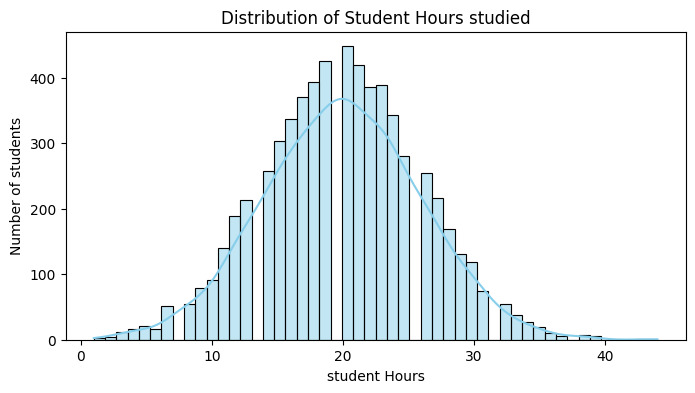

In [18]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Student Hours studied')
sns.histplot(students['Hours_Studied'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('student Hours')
plt.ylabel('Number of students')
plt.show()


Explore Attendance column :

In [19]:
students['Attendance'].describe()

,Attendance
count,6378.000000
mean,80.020853
std,11.550723
min,60.000000
25%,70.000000
50%,80.000000
75%,90.000000
max,100.000000


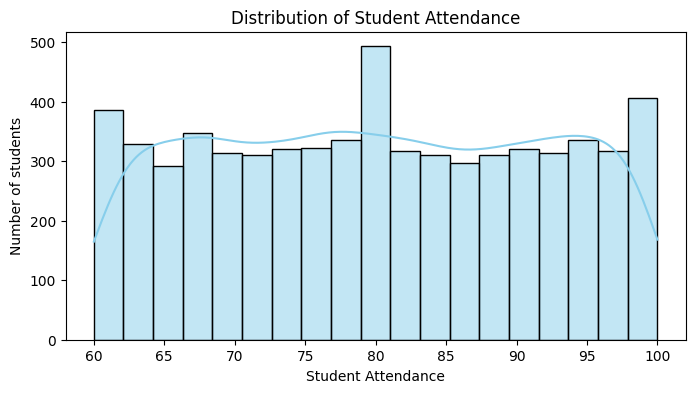

In [20]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Student Attendance')
sns.histplot(students['Attendance'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Student Attendance')
plt.ylabel('Number of students')
plt.show()


Explore Sleep_Hours column :

In [21]:
students['Sleep_Hours'].describe()

,Sleep_Hours
count,6378.000000
mean,7.034964
std,1.468033
min,4.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


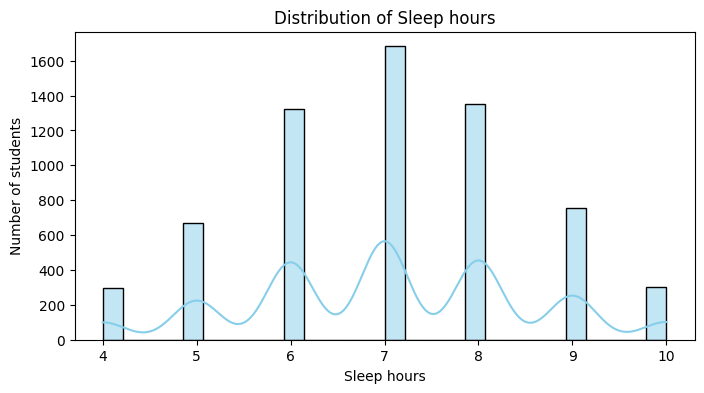

In [22]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Sleep hours')
sns.histplot(students['Sleep_Hours'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Sleep hours')
plt.ylabel('Number of students')
plt.show()


ExplorePrevious_Scores column :

In [23]:
students['Previous_Scores'].describe()

,Previous_Scores
count,6378.000000
mean,75.066165
std,14.400389
min,50.000000
25%,63.000000
50%,75.000000
75%,88.000000
max,100.000000


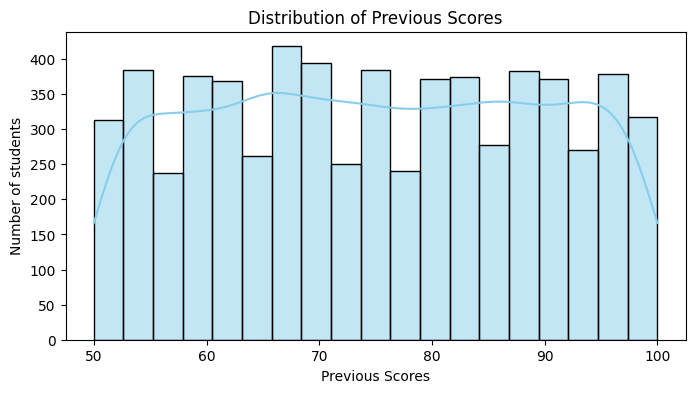

In [24]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Previous Scores')
sns.histplot(students['Previous_Scores'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Previous Scores')
plt.ylabel('Number of students')
plt.show()


Explore Tutoring_Sessions column :

In [25]:
students['Tutoring_Sessions'].describe()

,Tutoring_Sessions
count,6378.000000
mean,1.495296
std,1.233984
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


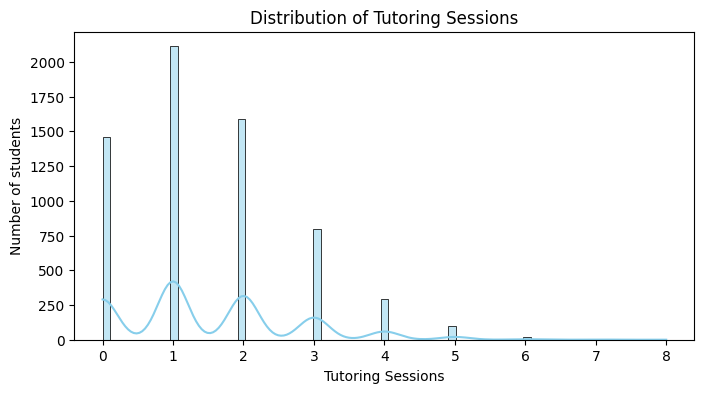

In [26]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Tutoring Sessions')
sns.histplot(students['Tutoring_Sessions'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Tutoring Sessions')
plt.ylabel('Number of students')
plt.show()


Explore Physical_Activity column :

In [27]:
students['Physical_Activity'].describe()

,Physical_Activity
count,6378.000000
mean,2.972719
std,1.028926
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


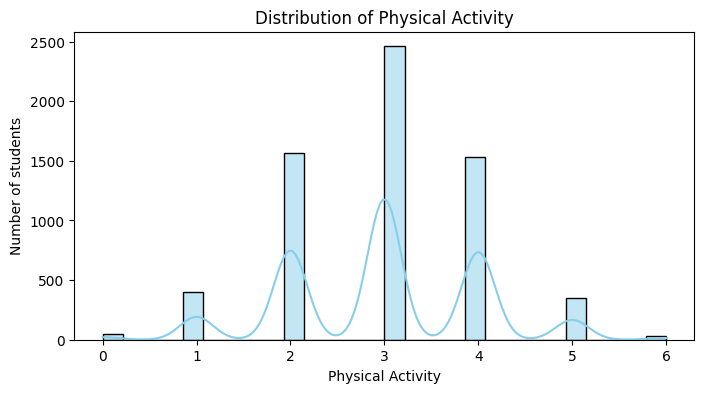

In [28]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Physical Activity')
sns.histplot(students['Physical_Activity'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Physical Activity')
plt.ylabel('Number of students')
plt.show()


Explore Target column :

In [29]:
students['Exam_Score'].describe()

,Exam_Score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


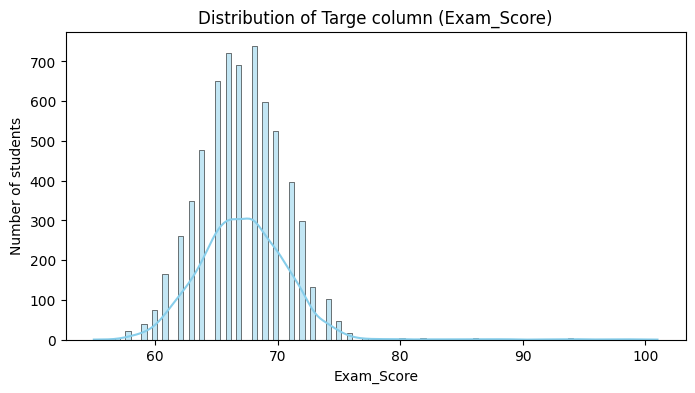

In [30]:
plt.figure(figsize=(8,4))
plt.title('Distribution of Targe column (Exam_Score)')
sns.histplot(students['Exam_Score'] , color= 'skyblue' ,label='Student Hours' , kde=True )
plt.xlabel('Exam_Score')
plt.ylabel('Number of students')
plt.show()

Explore all Categorical columns :

In [31]:
cat_cols = students.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    counts = students[col].value_counts()
    percentages = students[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    print(summary)



Column: Parental_Involvement
                      Count  Percentage
Parental_Involvement                   
Medium                 3251       50.97
High                   1836       28.79
Low                    1291       20.24

Column: Access_to_Resources
                     Count  Percentage
Access_to_Resources                   
Medium                3204       50.24
High                  1900       29.79
Low                   1274       19.97

Column: Extracurricular_Activities
                            Count  Percentage
Extracurricular_Activities                   
Yes                          3807       59.69
No                           2571       40.31

Column: Motivation_Level
                  Count  Percentage
Motivation_Level                   
Medium             3237       50.75
Low                1864       29.23
High               1277       20.02

Column: Internet_Access
                 Count  Percentage
Internet_Access                   
Yes               5893   

Outlier Detection and study it :

In [32]:
numeric_columns = students.select_dtypes(include='number').columns

for col in numeric_columns:
    Q1 = students[col].quantile(0.25)
    Q3 = students[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outlier_rows = students[(students[col] < lower_bound) | (students[col] > upper_bound)][col]

    print(f"--- {col} ---")
    print(f"Number of outliers: {len(outlier_rows)}")

    if len(outlier_rows) > 0:
        print(f"Min outlier value: {outlier_rows.min()}")
        print(f"Max outlier value: {outlier_rows.max()}")
    else:
        print("No outliers detected.")

    print()


--- Hours_Studied ---
Number of outliers: 40
Min outlier value: 1
Max outlier value: 44

--- Attendance ---
Number of outliers: 0
No outliers detected.

--- Sleep_Hours ---
Number of outliers: 0
No outliers detected.

--- Previous_Scores ---
Number of outliers: 0
No outliers detected.

--- Tutoring_Sessions ---
Number of outliers: 423
Min outlier value: 4
Max outlier value: 8

--- Physical_Activity ---
Number of outliers: 0
No outliers detected.

--- Exam_Score ---
Number of outliers: 103
Min outlier value: 55
Max outlier value: 101



show outliers in each featuer :

/tmp/ipython-input-3988200973.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(students[numeric_columns] , labels=numeric_columns)


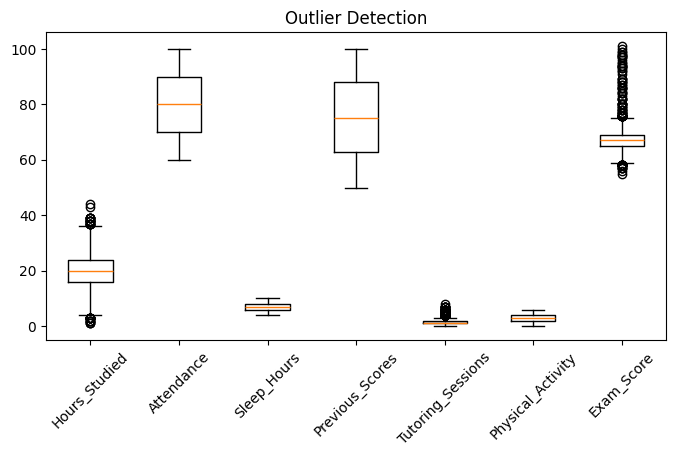

In [33]:
plt.figure(figsize=(8,4))
plt.title('Outlier Detection')
plt.boxplot(students[numeric_columns] , labels=numeric_columns)
plt.xticks(rotation=45)
plt.show()


handle the students that have more than 100 score :

In [34]:
students['Exam_Score'] = students['Exam_Score'].replace(101 , 100)

In [35]:
len(students[students['Exam_Score'] > 100])

0

Transform Tutoring session using log to reduce skewd of the data :

In [36]:
students['Tutoring_Sessions_log'] = np.log1p(students['Tutoring_Sessions'])

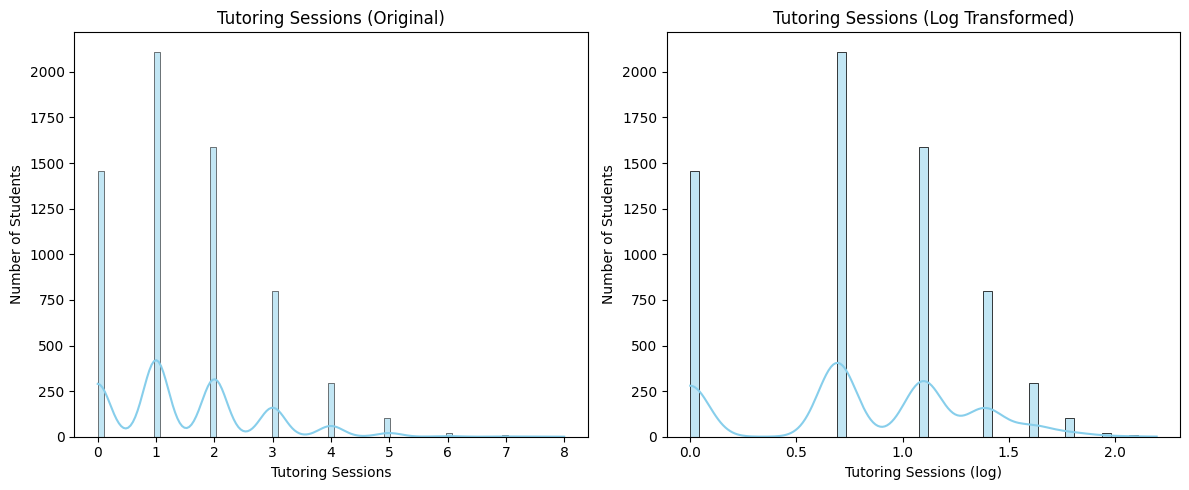

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Tutoring Sessions (Original)')
sns.histplot(
    students['Tutoring_Sessions'],
    color='skyblue',
    kde=True,
    line_kws={'color': 'red'}
)
plt.xlabel('Tutoring Sessions')
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
plt.title('Tutoring Sessions (Log Transformed)')
sns.histplot(
    students['Tutoring_Sessions_log'],
    color='skyblue',
    kde=True,
    line_kws={'color': 'red'}
)
plt.xlabel('Tutoring Sessions (log)')
plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()


In [38]:
students.drop(columns='Tutoring_Sessions' , inplace=True)

In [39]:
students.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Tutoring_Sessions_log'],
      dtype='object')

# Featuers Selection

In [40]:
students.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Tutoring_Sessions_log
0,23,84,Low,High,No,7,73,Low,Yes,Low,Medium,Public,Positive,3,No,High School,Near,Male,67,0.000000
1,19,64,Low,Medium,No,8,59,Low,Yes,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61,1.098612
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,1.098612
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71,0.693147
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,Medium,High,Public,Neutral,4,No,College,Near,Female,70,1.386294
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71,1.386294
6,29,84,Medium,Low,Yes,7,68,Low,Yes,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67,0.693147
7,25,78,Low,High,Yes,6,50,Medium,Yes,High,High,Public,Negative,2,No,High School,Far,Male,66,0.693147
8,17,94,Medium,High,No,6,80,High,Yes,Medium,Low,Private,Neutral,1,No,College,Near,Male,69,0.000000
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,High,High,Public,Positive,5,No,High School,Moderate,Male,72,0.000000


In [45]:
from sklearn.feature_selection import f_regression , mutual_info_regression
from sklearn.preprocessing import LabelEncoder

y = students['Exam_Score']

numeric_feature = students.select_dtypes(include=[np.number]).drop(columns = ['Exam_Score']).columns
categorical_feature = students.select_dtypes(include=['object' , 'category']).columns

results = []

for col in numeric_feature:
  X = students[[col]]
  f_val , p_val = f_regression(X , y)
  mi = mutual_info_regression(X , y)

  results.append({
      'Featuer' : col ,
      'Type' : 'Numeric' ,
      'f_value' : f_val[0] ,
      'p_val' : p_val[0] ,
      'Mutual_Info' : mi[0] ,
      'Correlation' : students[col].corr(y)
  })

for col in categorical_feature:
    le = LabelEncoder()
    encoded = le.fit_transform(students[col]).reshape(-1, 1)

    f_val, p_val = f_regression(encoded, y)
    mi = mutual_info_regression(encoded, y)

    results.append({
        'Feature': col,
        'Type': 'Categorical',
        'F_value': f_val[0],
        'p_value': p_val[0],
        'Mutual_Info': mi[0],
        'Correlation': np.nan
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Mutual_Info', ascending=False).reset_index(drop=True)



In [48]:
results_df

,Featuer,Type,f_value,p_val,Mutual_Info,Correlation,Feature,F_value,p_value
0,Attendance,Numeric,3238.817271,0.000000e+00,0.303973,0.580394,NaN,NaN,NaN
1,Hours_Studied,Numeric,1576.214412,3.124744e-308,0.157071,0.445209,NaN,NaN,NaN
2,NaN,Categorical,NaN,NaN,0.023925,NaN,Access_to_Resources,50.397231,1.391903e-12
3,NaN,Categorical,NaN,NaN,0.019248,NaN,Parental_Involvement,56.913475,5.189834e-14
4,Tutoring_Sessions_log,Numeric,147.089081,1.750004e-33,0.013677,0.150163,NaN,NaN,NaN
5,NaN,Categorical,NaN,NaN,0.012304,NaN,Extracurricular_Activities,25.448627,4.668892e-07
6,NaN,Categorical,NaN,NaN,0.009605,NaN,Gender,0.152295,6.963647e-01
7,Physical_Activity,Numeric,4.037194,4.454983e-02,0.009071,0.025155,NaN,NaN,NaN
8,Previous_Scores,Numeric,199.757492,1.109321e-44,0.006549,0.174292,NaN,NaN,NaN
9,NaN,Categorical,NaN,NaN,0.006070,NaN,Peer_Influence,63.269270,2.117535e-15


Data Frame with selected featuers :

In [50]:
students_model = students[['Attendance' , 'Hours_Studied' , 'Parental_Involvement' , 'Access_to_Resources' , 'Peer_Influence' , 'Tutoring_Sessions_log' , 'Previous_Scores' , 'Extracurricular_Activities' , 'Learning_Disabilities' , 'Distance_from_Home' , 'Exam_Score']]
students_model.head()

,Attendance,Hours_Studied,Parental_Involvement,Access_to_Resources,Peer_Influence,Tutoring_Sessions_log,Previous_Scores,Extracurricular_Activities,Learning_Disabilities,Distance_from_Home,Exam_Score
0,84,23,Low,High,Positive,0.000000,73,No,No,Near,67
1,64,19,Low,Medium,Negative,1.098612,59,No,No,Moderate,61
2,98,24,Medium,Medium,Neutral,1.098612,91,Yes,No,Near,74
3,89,29,Low,Medium,Negative,0.693147,98,Yes,No,Moderate,71
4,92,19,Medium,Medium,Neutral,1.386294,65,Yes,No,Near,70


# Modeling :

In [51]:
students_model.shape

(6378, 11)

In [52]:
X = students_model.drop(columns=['Exam_Score'])
X.head()

,Attendance,Hours_Studied,Parental_Involvement,Access_to_Resources,Peer_Influence,Tutoring_Sessions_log,Previous_Scores,Extracurricular_Activities,Learning_Disabilities,Distance_from_Home
0,84,23,Low,High,Positive,0.000000,73,No,No,Near
1,64,19,Low,Medium,Negative,1.098612,59,No,No,Moderate
2,98,24,Medium,Medium,Neutral,1.098612,91,Yes,No,Near
3,89,29,Low,Medium,Negative,0.693147,98,Yes,No,Moderate
4,92,19,Medium,Medium,Neutral,1.386294,65,Yes,No,Near


In [53]:
y.head()

,Exam_Score
0,67
1,61
2,74
3,71
4,70


In [62]:
num_model = students_model.select_dtypes(include=[np.number]).drop(columns = 'Exam_Score').columns.tolist()
print(num_model)
cat_model = students_model.select_dtypes(include= 'object').columns.tolist()
print(cat_model)

['Attendance', 'Hours_Studied', 'Tutoring_Sessions_log', 'Previous_Scores']
['Parental_Involvement', 'Access_to_Resources', 'Peer_Influence', 'Extracurricular_Activities', 'Learning_Disabilities', 'Distance_from_Home']


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model :

In [74]:
preprocess = ColumnTransformer(
    transformers= [
        ('num' , StandardScaler() , num_model) ,
        ('cat' , OneHotEncoder() , cat_model)
    ]
)

lr_pipeline = Pipeline([
    ('preprocessors' ,preprocess ) ,
    ('reg' , LinearRegression())
])

split the data :

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train the model :

In [76]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Attendance',
                                                   'Hours_Studied',
                                                   'Tutoring_Sessions_log',
                                                   'Previous_Scores']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Peer_Influence',
                                                   'Extracurricular_Activities',
                                                   'Learning_Disabilities',
                                                   'Distance_from_Home'])])),
                ('reg', LinearRegression())])

In [77]:
y_pred = lr_pipeline.predict(X_test)
y_pred

array([74.23261097, 66.5387017 , 70.66444356, ..., 64.88665452,
       65.82377601, 72.80305792])

In [78]:
y_train_pred = lr_pipeline.predict(X_train)

y_test_pred = lr_pipeline.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Train R²:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)


Train RMSE: 2.232237917310926
Train R²: 0.6732610700941601
Test RMSE: 2.156000451430672
Test R²: 0.7008661605015537


Ridge Model :

In [101]:
ridge_pipeline = Pipeline([
    ("preprocessor", preprocess),
    ("regressor", Ridge(alpha=0.5))
])

In [102]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Attendance',
                                                   'Hours_Studied',
                                                   'Tutoring_Sessions_log',
                                                   'Previous_Scores']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Peer_Influence',
                                                   'Extracurricular_Activities',
                                                   'Learning_Disabilities',
                                                   'Distance_from_Home'])])),
                ('regressor', Ridge(alpha=0.5))])

In [103]:
ridge_pred = ridge_pipeline.predict(X_test)

In [104]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

In [105]:
print("Ridge → R²:", ridge_r2, " | RMSE:", ridge_rmse)

Ridge → R²: 0.7008636782686344  | RMSE: 2.156009396731213


Lasso Model :

In [106]:
lasso_pipeline = Pipeline([
    ("preprocessor", preprocess),
    ("regressor", Lasso(alpha=0.1))
])

In [97]:
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Attendance',
                                                   'Hours_Studied',
                                                   'Tutoring_Sessions_log',
                                                   'Previous_Scores']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Peer_Influence',
                                                   'Extracurricular_Activities',
                                                   'Learning_Disabilities',
                                                   'Distance_from_Home'])])),
                ('regressor', Lasso(alpha=0.1))])

In [98]:
lasso_pred = lasso_pipeline.predict(X_test)

In [99]:

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

In [100]:
print("Lasso → R²:", lasso_r2, " | RMSE:", lasso_rmse)

Lasso → R²: 0.667585817617603  | RMSE: 2.27277187819655
